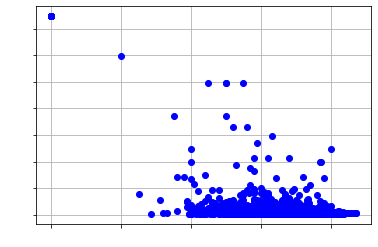

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['text.color'] = 'white'
# 세로 : result, 세로 : vote_average
plt.plot(df.vote_average, df.result, 'bo')
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid()
plt.show()